## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名 黄德辉
+ 学号 0165241

In [2]:
import numpy as np
import pandas as pd

In [ ]:
请参考下面命令将CEPS.csv数据读入python

In [64]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

In [8]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [26]:
plt.rcParams['font.sans-serif']=['SimHei']#设置字体，用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

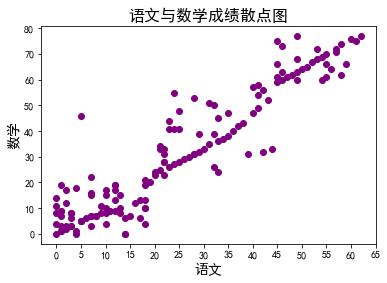

In [35]:
fig=plt.figure()
ax1=fig.add_subplot(111)
plt.title("语文与数学成绩散点图", fontsize=16)#图标题
x=df.stdchn[:150]#数据选取，简
y=df.stdmat[:150]

plt.xlabel('语文', fontsize=14)#x轴标题
ax1.xaxis.set_major_locator(MultipleLocator(5))#x轴刻度间隔
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))#刻度数字格式
plt.ylabel('数学', fontsize=14)#y轴
ax1.yaxis.set_major_locator(MultipleLocator(10))#y轴刻度
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.scatter(x,y,color='purple')
plt.show()

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

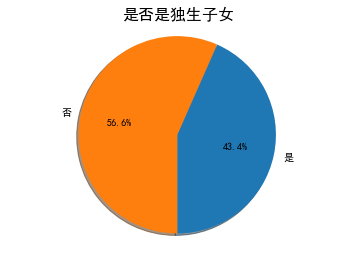

In [45]:
x=sum(df.b01==1)/(sum(df.b01==1)+sum(df.b01==2))
y=sum(df.b01==2)/(sum(df.b01==1)+sum(df.b01==2))
sizes = [x,y]

fig2, ax2 = plt.subplots()
ax2.set_title("是否是独生子女", fontsize=16, loc='center')
ax2.pie(sizes, labels=['是', '否'], autopct='%.1f%%', shadow=True, startangle=-90)
plt.axis('equal')

plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

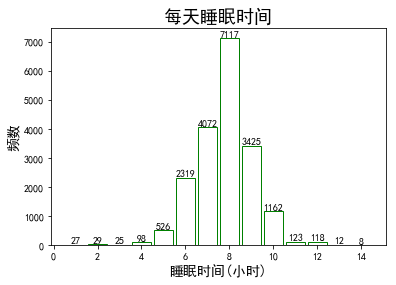

In [209]:
sentinels = {'b18a': [' ','0', '15','16','17','18','19', '20', '21', '22', '23', '24', '41']}#要剔除的数据，还有个熊孩子填了41
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)                          #选取睡眠时间在1-14小时的数据
df = pd.DataFrame(df)

Y = df['b18a'].value_counts().sort_index()#使用pandas的值计数函数按index升序输出（并将Series对象的值转化为列表）#Series也能用

X = [i for i in range(1,15)]
plt.bar(X,Y,width = 0.85,facecolor = 'white',edgecolor = 'green')#后3个元素添加绿色外壳

for x,y in zip(X,Y):#加数据标签，可要可不要
    plt.text(x, y, '%d' % y, ha='center', va= 'bottom')

plt.title("每天睡眠时间", fontsize=18)#外框三要素
plt.xlabel("睡眠时间(小时)", fontsize=14)     #plt.xlim(0,+15)#可要可不要
plt.ylabel("频数", fontsize=14)
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


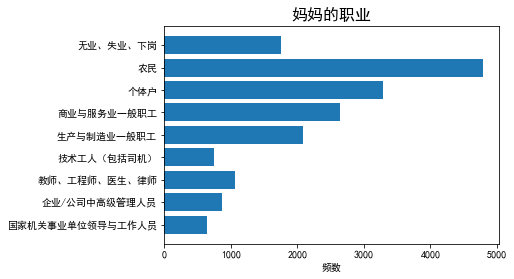

In [215]:
nums = []
for i in range(1, 10):
    nums.append(sum(df.b08a==str(i)))

names=['国家机关事业单位领导与工作人员','企业/公司中高级管理人员',
'教师、工程师、医生、律师','技术工人（包括司机）','生产与制造业一般职工',
'商业与服务业一般职工','个体户','农民','无业、失业、下岗']

plt.barh(range(len(nums)),nums,tick_label=names)
plt.title("妈妈的职业", fontsize=16)
plt.xlabel('频数')
plt.show()